In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [2]:
%matplotlib inline

from session.sessions import selected_009266
from imports import *
from scipy import stats
from loading import load_session_data
from target import get_spike_counts
np.set_printoptions(suppress=True)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Session data

In [327]:
selected_009266

['009266_hippoSIT_2023-04-17_17-04-17',
 '009266_hippoSIT_2023-04-18_10-10-37',
 '009266_hippoSIT_2023-04-18_17-03-10',
 '009266_hippoSIT_2023-04-19_10-33-51',
 '009266_hippoSIT_2023-04-20_08-57-39',
 '009266_hippoSIT_2023-04-20_15-24-14',
 '009266_hippoSIT_2023-04-21_08-43-00',
 '009266_hippoSIT_2023-04-21_13-12-31',
 '009266_hippoSIT_2023-04-24_10-08-11',
 '009266_hippoSIT_2023-04-24_16-56-55',
 '009266_hippoSIT_2023-04-26_08-20-17',
 '009266_hippoSIT_2023-05-02_12-22-14',
 '009266_hippoSIT_2023-05-04_19-47-15',
 '009266_hippoSIT_2023-05-22_09-27-22',
 '009266_hippoSIT_2023-05-23_09-18-05',
 '009266_hippoSIT_2023-05-25_15-55-57',
 '009266_hippoSIT_2023-06-14_08-21-23',
 '009266_hippoSIT_2023-06-19_08-58-35']

In [328]:
session = selected_009266[9]

session_data = load_session_data(session)

tl = session_data['tl']
trials = session_data['trials']
cfg = session_data['cfg']
areas = session_data['areas']
aeps = session_data['aeps']
aeps_events = session_data['aeps_events']
AEP_metrics_lims = session_data['AEP_metrics_lims']
AEP_metrics_raw = session_data['AEP_metrics_raw']
AEP_metrics_norm = session_data['AEP_metrics_norm']
tgt_matrix = session_data['tgt_matrix']
single_units = session_data['single_units']
spike_times = session_data['spike_times']
unit_names = session_data['unit_names']
animal = session_data['animal']
aeps_file = session_data['aeps_file']
h5_file = session_data['h5_file']
report_path = session_data['report_path']
session

'009266_hippoSIT_2023-04-24_16-56-55'

In [329]:
aeps_tl_idxs = []  # idxs to timeline for AEP events
for event_t in aeps_events[:, 0]:  # AEP event times
    event_idx = (np.abs(tl[:, 0] - event_t)).argmin()
    aeps_tl_idxs.append(event_idx)
aeps_tl_idxs = np.array(aeps_tl_idxs)

## Instantaneous correlation

In [330]:
area = 'A1'
m1, m2 = 'P1', 'P2'
window_l = 40  # in AEP events, 10 sec is ~40 events

idxs_bgr = np.where(aeps_events[:, 1] == 1)[0]
idxs_tgt = np.where(aeps_events[:, 1] == 2)[0]

metric1 = AEP_metrics_norm[area][m1]  #[idxs_tgt]
metric2 = AEP_metrics_norm[area][m2]  #[idxs_tgt]
#metric1, metric2 = i_rate[aeps_tl_idxs], N2_smooth_norm

inst_corrs = np.zeros(len(metric1) - window_l)
for i in range(len(inst_corrs)):
    inst_corrs[i] = stats.pearsonr(metric1[i:i + window_l], metric2[i:i + window_l])[0]
    
len(idxs_bgr), len(idxs_tgt)

(5489, 676)

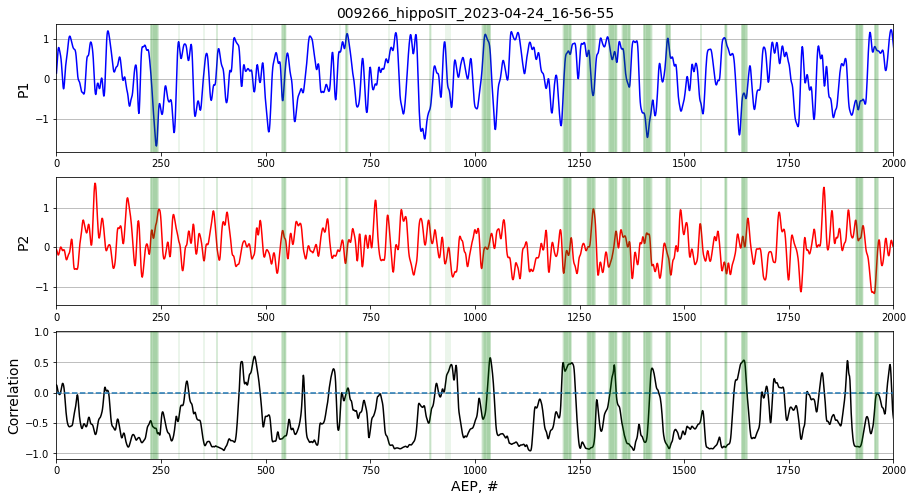

In [331]:
fig, axes = plt.subplots(3, 1, figsize=(15, 8))
axes[0].plot(metric1, color='blue', label=m1)
axes[0].set_title(session, fontsize=14)
axes[1].plot(metric2, color='red', label=m2)
axes[2].plot(inst_corrs, color='black', label='Corr.coeff.')
axes[2].axhline(0, ls='--')
axes[2].set_xlabel('AEP, #', fontsize=14)
for ax in axes:
    for idx in idxs_tgt:
        ax.axvline(idx, color='green', alpha=0.1)

y_lbls = [m1, m2, 'Correlation']
for i, ax in enumerate(axes):
    #ax.set_xlim(0, len(metric1))
    ax.set_xlim(0, 2000)
    ax.grid(axis='y')
    ax.set_ylabel(y_lbls[i], fontsize=14)
    
# plot unit response
#axes[3].plot(single_units['8-8'][aeps_tl_idxs], color='black', label='Unit')    

Text(0.5, 0, 'Corr. coef.')

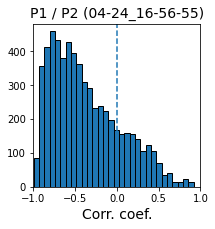

In [332]:
# correlation hist
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.hist(inst_corrs, bins=30, edgecolor='black')
ax.axvline(0, ls='--')
ax.set_xlim(-1, 1)
ax.set_title('%s / %s (%s)' % (m1, m2, session[-14:]), fontsize=14)
ax.set_xlabel('Corr. coef.', fontsize=14)

In [333]:
#np.corrcoef(single_units['3-15'][aeps_tl_idxs][40:], inst_corrs)
#np.corrcoef(tl[:, 3][aeps_tl_idxs][40:], inst_corrs)
#np.corrcoef(metric1[:-40], inst_corrs)
#np.corrcoef(metric2[:-40], inst_corrs)

In [334]:
# check tgt / bgr
# check dependence on strength of N1/P3

## 